# Data Mining

# Gurgen Hovakimyan

### Context: An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market.

### Content: In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for different segment of customers. This strategy has work exceptionally well for them. They plan to use the same strategy on new markets and have identified 2627 new potential customers.


In [1]:
# data manipulation and summary statistics
import numpy as np
import pandas as pd


# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from IPython.display import clear_output


# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler

# classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


# Model tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


# accuracy metrics
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.evaluate import confusion_matrix


# other
import sys
import warnings
from time import sleep

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
data = pd.read_csv("Car_company_customers.csv")

* ID - unique ID of customer 
* Gender - Male or Female
* Ever_Married - Yes or No
* Age - cont. variable
* Graduated - Yes or No
* Profession- Artist', 'Doctor', 'Engineer', 'Entertainment', 'Executive', 'Healthcare', 'Homemaker', 'Lawyer', 'Marketing'
* Work_Experience - in years
* Spending_score - Low, Average, High
* Family_size - cont. variable
* Var_1 - unknown categorical variable with 7 levels
* Segmentation - dependent variable with 4 levels A B C D

# Exploratory Data Analysis and Data Visualizaiton

In [3]:
data.head()

ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4            D  
1        Average          3.0  Cat_4            A  
2            Low          1.0  Cat_6            B  
3           High          2.0  Cat_6            B  
4           High          6.0  Cat_6            A

In [4]:
data.describe(include=['object'])

Gender Ever_Married Graduated Profession Spending_Score  Var_1  \
count    8068         7928      7990       7944           8068   7992   
unique      2            2         2          9              3      7   
top      Male          Yes       Yes     Artist            Low  Cat_6   
freq     4417         4643      4968       2516           4878   5238   

       Segmentation  
count          8068  
unique            4  
top               D  
freq           2268

In [5]:
data.describe()

ID          Age  Work_Experience  Family_Size
count    8068.000000  8068.000000      7239.000000  7733.000000
mean   463479.214551    43.466906         2.641663     2.850123
std      2595.381232    16.711696         3.406763     1.531413
min    458982.000000    18.000000         0.000000     1.000000
25%    461240.750000    30.000000         0.000000     2.000000
50%    463472.500000    40.000000         1.000000     3.000000
75%    465744.250000    53.000000         4.000000     4.000000
max    467974.000000    89.000000        14.000000     9.000000

In [6]:
data[data.select_dtypes(['object']).columns] =\
data.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [7]:
data["Segmentation"] = data['Segmentation'].cat.reorder_categories(['A', 'B', "C", "D"])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               8068 non-null   int64   
 1   Gender           8068 non-null   category
 2   Ever_Married     7928 non-null   category
 3   Age              8068 non-null   int64   
 4   Graduated        7990 non-null   category
 5   Profession       7944 non-null   category
 6   Work_Experience  7239 non-null   float64 
 7   Spending_Score   8068 non-null   category
 8   Family_Size      7733 non-null   float64 
 9   Var_1            7992 non-null   category
 10  Segmentation     8068 non-null   category
dtypes: category(7), float64(2), int64(2)
memory usage: 308.8 KB


In [9]:
data = data.dropna()

In [10]:
data["Segmentation"].value_counts()

D    1757
C    1720
A    1616
B    1572
Name: Segmentation, dtype: int64

In [11]:
data["Profession"].value_counts()

Artist           2192
Healthcare       1077
Entertainment     809
Doctor            592
Engineer          582
Executive         505
Lawyer            500
Marketing         233
Homemaker         175
Name: Profession, dtype: int64

In [12]:
data['Var_1'].value_counts()

Cat_6    4476
Cat_4     849
Cat_3     634
Cat_2     362
Cat_7     166
Cat_1     104
Cat_5      74
Name: Var_1, dtype: int64

In [13]:
data["Spending_Score"].value_counts()

Low        3999
Average    1662
High       1004
Name: Spending_Score, dtype: int64

In [14]:
sns.pairplot(data, hue = "Segmentation");

In [15]:
sns.pairplot(data, hue = "Var_1");

In [16]:
px.box(data, "Segmentation", "Age", color="Segmentation",
       title="Boxplot of Ages Splited by Segments")

In [17]:
px.box(data,  x='Segmentation', y='Work_Experience', color="Segmentation",
       title="Boxplot of Work Experience Splited by Segments")

In [18]:
data.groupby("Segmentation")['Age', "Work_Experience"].corr()

Age  Work_Experience
Segmentation                                           
A            Age              1.000000        -0.224256
             Work_Experience -0.224256         1.000000
B            Age              1.000000        -0.233969
             Work_Experience -0.233969         1.000000
C            Age              1.000000        -0.163089
             Work_Experience -0.163089         1.000000
D            Age              1.000000        -0.077307
             Work_Experience -0.077307         1.000000

In [19]:
data[['Age', "Work_Experience"]].corr()

Age  Work_Experience
Age              1.000000        -0.188769
Work_Experience -0.188769         1.000000

In [20]:
px.box(data,  x='Spending_Score', y='Age', color="Segmentation",
       title="Boxplot of Spending Score Splited by Segments")

In [21]:
px.box(data,  x='Spending_Score', y='Family_Size', color="Segmentation",
       title="Boxplot of Family_Size Splited by Spending Score and Segments")

In [22]:
px.box(data,  x='Spending_Score', y='Work_Experience', color="Segmentation",
       title="Boxplot of Work Experience Splited by Spending Score Segments")

In [23]:
px.box(data,  x='Var_1', y='Age', color="Segmentation",
       title="Boxplot of Age Splited by Var_1 and Segments")

In [24]:
px.box(data,  x='Var_1', y='Work_Experience', color="Segmentation",
       title="Boxplot of Work Experience Splited by Var_1 and Segments")

In [25]:
px.box(data,  x='Profession', y='Age', color="Segmentation",
       title="Boxplot of Age Splited by Profession and Segments")

In [26]:
px.box(data,  x='Profession', y='Work_Experience', color="Segmentation",
       title="Boxplot of Work Experience Splited by Profession and Segments")

In [27]:
temp_data = data[data.Profession != "Lawyer"]

In [28]:
temp_data[['Age', "Work_Experience"]].corr()

Age  Work_Experience
Age              1.000000        -0.153384
Work_Experience -0.153384         1.000000

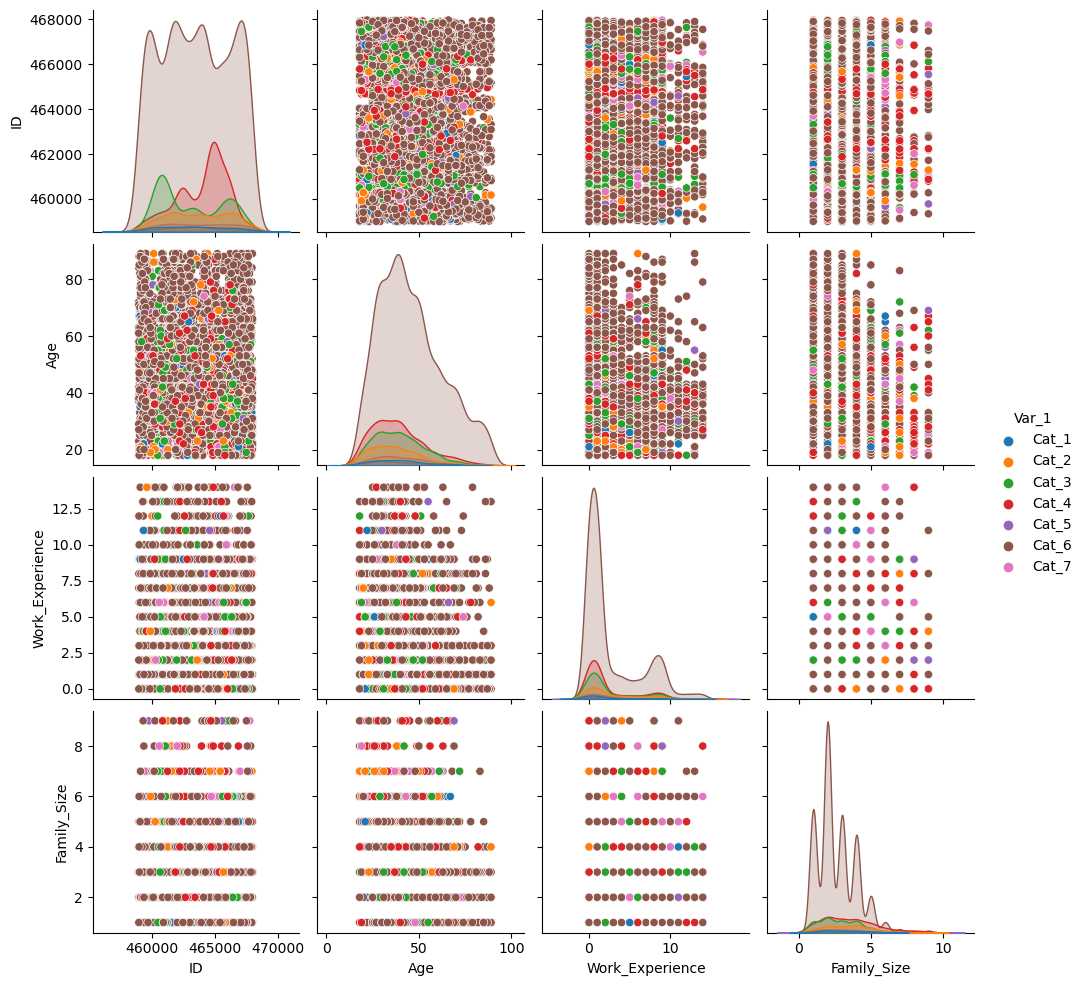

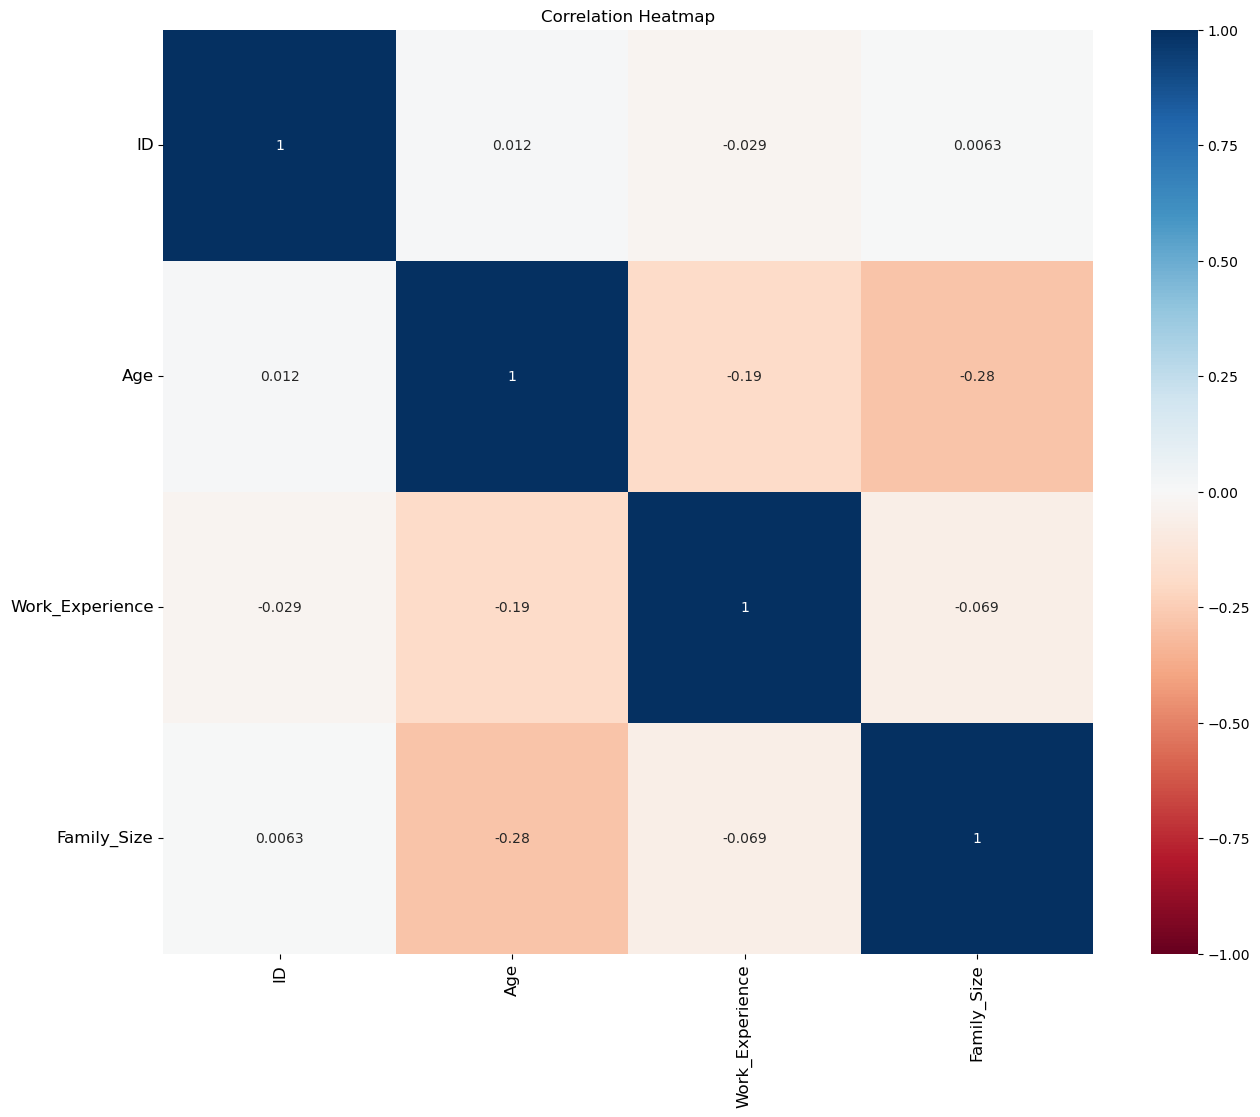

In [29]:
plt.figure(figsize=(15, 12))
s = sns.heatmap(data.corr(),
                annot=True,
                cmap='RdBu',
                vmin=-1,
                vmax=1)

s.set_yticklabels(s.get_yticklabels(), rotation=0, fontsize=12)
s.set_xticklabels(s.get_xticklabels(), rotation=90, fontsize=12)
plt.title('Correlation Heatmap')
plt.show()

In [30]:
cross = pd.crosstab(data['Segmentation'], data['Gender']
                    ).apply(lambda r: r/r.sum(), axis=1)

plt.figure(figsize=(8, 5))
s = sns.heatmap(cross, annot=True, cmap='RdBu', vmin=0, vmax=1)

In [31]:
cross = pd.crosstab(data['Segmentation'], data['Var_1']
                    ).apply(lambda r: r/r.sum(), axis=1)

plt.figure(figsize=(8, 5))
s = sns.heatmap(cross, annot=True, cmap='RdBu', vmin=0, vmax=1)

In [32]:
cross = pd.crosstab(data['Segmentation'], data['Family_Size']
                    ).apply(lambda r: r/r.sum(), axis=1)

plt.figure(figsize=(8, 5))
s = sns.heatmap(cross, annot=True, cmap='RdBu', vmin=0, vmax=1)

In [33]:
cross = pd.crosstab(data['Profession'], data['Segmentation']
                    ).apply(lambda r: r/r.sum(), axis=1)

plt.figure(figsize=(8, 5))
s = sns.heatmap(cross, annot=True, cmap='RdBu', vmin=0, vmax=1)

In [34]:
ord_enc = OrdinalEncoder()

In [35]:
data["Segmentation"] = ord_enc.fit_transform(data[["Segmentation"]])
data["Var_1"] = ord_enc.fit_transform(data[["Var_1"]])

In [36]:
data_parcor = data[["Segmentation", "Age", "Work_Experience", "Family_Size", "Var_1"]]

In [37]:
fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = data_parcor['Var_1'],
                   colorscale = [[0,'purple'],[0.16,'lightseagreen'],[0.32,'gold'], [0.48, "blue"], [0.64, "red"], [1, "green"]]),
        dimensions = [dict(range = [data_parcor[param].min(),data_parcor[param].max()],
                           constraintrange = [(data_parcor[param].max()+data_parcor[param].min())/2 - (data_parcor[param].max()-data_parcor[param].min())/10,
                                                (data_parcor[param].max()+data_parcor[param].min())/2 + (data_parcor[param].max()-data_parcor[param].min())/10],
                            label = param, values = data_parcor[param])        
                    for param in ['Age', 'Work_Experience', 'Family_Size', "Segmentation"]
                    ]
        )
    
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

### Results: From EDA and Visualizaiton we can conclude that all features seperately and combined are significant, some of variables are significant only for some categories, but we must include them. Also it's very strange that correlation between Age and work experience is negative. Althoug we can see that there is relationship between this featurers and segments.

# Machine Learning classification

In [38]:
target = data['Segmentation']
X = data.drop(columns=['Segmentation', 'ID'])
X.head()

Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
0    Male           No   22        No  Healthcare              1.0   
2  Female          Yes   67       Yes    Engineer              1.0   
3    Male          Yes   67       Yes      Lawyer              0.0   
5    Male          Yes   56        No      Artist              0.0   
6    Male           No   32       Yes  Healthcare              1.0   

  Spending_Score  Family_Size  Var_1  
0            Low          4.0    3.0  
2            Low          1.0    5.0  
3           High          2.0    5.0  
5        Average          2.0    5.0  
6            Low          3.0    5.0

In [39]:
X = pd.get_dummies(X, columns=["Gender", "Ever_Married", "Graduated", "Profession", "Spending_Score", "Var_1"])

In [40]:
train_x, test_x, train_y, test_y = train_test_split(
    X, target, test_size=0.25, random_state=42)
print(
    f"Number of observations \n Train set: {len(train_x)}\n Test set: {len(test_x)}")

Number of observations 
 Train set: 4998
 Test set: 1667


In [41]:
train_x = StandardScaler().fit(train_x).transform(train_x)

In [42]:
test_x = StandardScaler().fit(test_x).transform(test_x)

# Decision Tree

In [43]:
DTR = DecisionTreeClassifier()

In [44]:
param_grid = {
    "criterion": ['gini', 'entropy'],
    "max_depth": [2,4,6,8,10,12]
}

In [45]:
CV_dtr = GridSearchCV(estimator=DTR, param_grid=param_grid, cv=5)

In [46]:
CV_dtr.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12]})

In [47]:
CV_dtr.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [48]:
pred=CV_dtr.predict(test_x)

In [49]:
cm = confusion_matrix(test_y, pred)

In [50]:
conf_data = pd.DataFrame(cm, columns=['A_pred', 'B_pred', 'C_pred', "D_pred"],
                         index=["A_act", "B_act", "C_act", "D_act"])

In [51]:
precision = []
for i in range(conf_data.shape[0]):
    temp = conf_data.iloc[i, i] / conf_data.iloc[i, ].sum()
    precision.append(temp)

In [52]:
conf_data['Precision'] = precision

In [53]:
conf_data

A_pred  B_pred  C_pred  D_pred  Precision
A_act     225      62      44      70   0.561097
B_act     126      99     128      34   0.255814
C_act      47      69     247      64   0.578454
D_act     119      19      10     304   0.672566

In [54]:
print("Accuracy for Decision Tree on CV data: ",accuracy_score(test_y, pred))

Accuracy for Decision Tree on CV data:  0.5248950209958009


# Random Forest

In [55]:
RFC = RandomForestClassifier()

In [56]:
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8, 9, 10],
    'criterion': ['gini', 'entropy']
}

In [57]:
CV_rfc = GridSearchCV(estimator=RFC, param_grid=param_grid, cv=5)

In [58]:
CV_rfc.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [59]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [60]:
rfc1 = RandomForestClassifier(
    random_state=42, max_features='sqrt', n_estimators=200, max_depth=8, criterion='gini')

In [61]:
rfc1.fit(train_x, train_y)

RandomForestClassifier(max_depth=8, max_features='sqrt', n_estimators=200,
                       random_state=42)

In [62]:
pred=rfc1.predict(test_x)

In [63]:
cm = confusion_matrix(test_y, pred)

In [64]:
conf_data = pd.DataFrame(cm, columns=['A_pred', 'B_pred', 'C_pred', "D_pred"],
                         index=["A_act", "B_act", "C_act", "D_act"])

In [65]:
precision = []
for i in range(conf_data.shape[0]):
    temp = conf_data.iloc[i, i] / conf_data.iloc[i, ].sum()
    precision.append(temp)

In [66]:
conf_data['Precision'] = precision

In [67]:
conf_data

A_pred  B_pred  C_pred  D_pred  Precision
A_act     210      69      48      74   0.523691
B_act     101     124     123      39   0.320413
C_act      40      71     250      66   0.585480
D_act     116      19      13     304   0.672566

In [68]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(test_y, pred))

Accuracy for Random Forest on CV data:  0.5326934613077384


# Logistic Regression

In [69]:
# l1 lasso l2 ridge
grid = {"C": np.logspace(-3, 3, 7), "penalty": ["l1", "l2"]}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, grid, cv=10)
logreg_cv.fit(train_x, train_y)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [70]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}


In [71]:
logreg2=LogisticRegression(C=1,penalty="l2")
logreg2.fit(train_x, train_y)

LogisticRegression(C=1)

In [72]:
pred=logreg2.predict(test_x)

In [73]:
cm_2 = confusion_matrix(test_y, pred)

In [74]:
conf_data_2 = pd.DataFrame(cm_2, columns = ['A_pred','B_pred','C_pred', "D_pred"],
                         index = ["A_act", "B_act", "C_act", "D_act"])

In [75]:
precision = []
for i in range(conf_data_2.shape[0]):
    temp = conf_data_2.iloc[i, i]/ conf_data_2.iloc[i, ].sum()
    precision.append(temp)
    

In [76]:
conf_data_2['precision'] = precision

In [77]:
conf_data_2

A_pred  B_pred  C_pred  D_pred  precision
A_act     202      53      69      77   0.503741
B_act     123      77     151      36   0.198966
C_act      54      46     270      57   0.632319
D_act      94      26      20     312   0.690265

In [78]:
print("Accuracy for Logistic Regression on CV data: ",accuracy_score(test_y, pred))

Accuracy for Logistic Regression on CV data:  0.5164967006598681
